# Assignment:  Decision Trees and Random Forests, Part 1

There are two notebooks for the assignment on Decision Trees and Random Forests - this is part 1 and involves regression.

## Regression with Decision Trees and Random Forests

In the previous Assignment on Regression, you performed regression on [scikit-learn's diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).  We are going to repeat the same process, only now we will train decision tree and random forest models.
* In the below, you can add any additional code cells you need

Train one decision tree with scikit-learn's DecisionTreeRegressor without specifically initializing the value of any hyperparameters.  Follow this process as you do so:
* Import [scikit-learn's diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)
* Split your data into a training set and a test set
* Train the model
  * Use all of the dataset's features when training
* Use a tree visualization method to show the trained decision tree model
* Evaluate the MSE and R-squared scores for your model on your test data

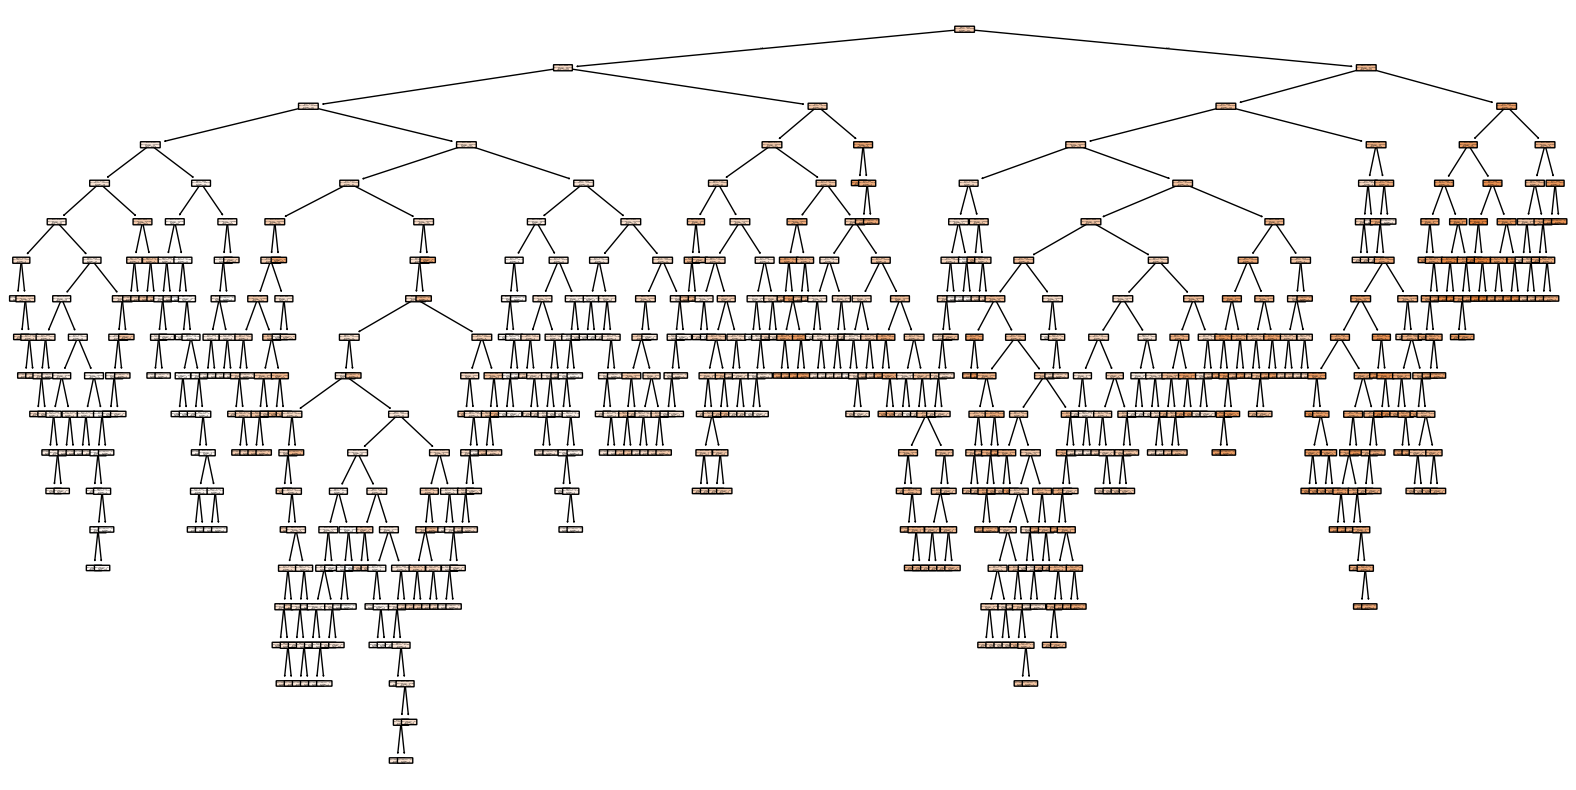

Mean Squared Error (MSE): 4976.80
R-squared (R2): 0.06


In [1]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, feature_names=diabetes.feature_names, filled=True, rounded=True)
plt.show()

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Train another decision tree for which you impose one or more constraints with regularization hyperparameters
* For example, you can use max_depth, max_leaf_nodes, or any other constraining parameter
  * [DecisionTreeRegressor documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
* Follow the same steps as above, but now use cross-validation to obtain the optimum value for your hyperparameter(s)
  * Plain cross-validation, K-folds cross-validation, or grid search cross-validation are all valid types of cross-validation to use here
* After you obtain the optimum hyperparameter values, train your model with the chosen hyperparameters
* Use a tree visualization method to show the trained decision tree model
* Evaluate the final MSE and R-squared scores for your model on your test data

Best hyperparameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


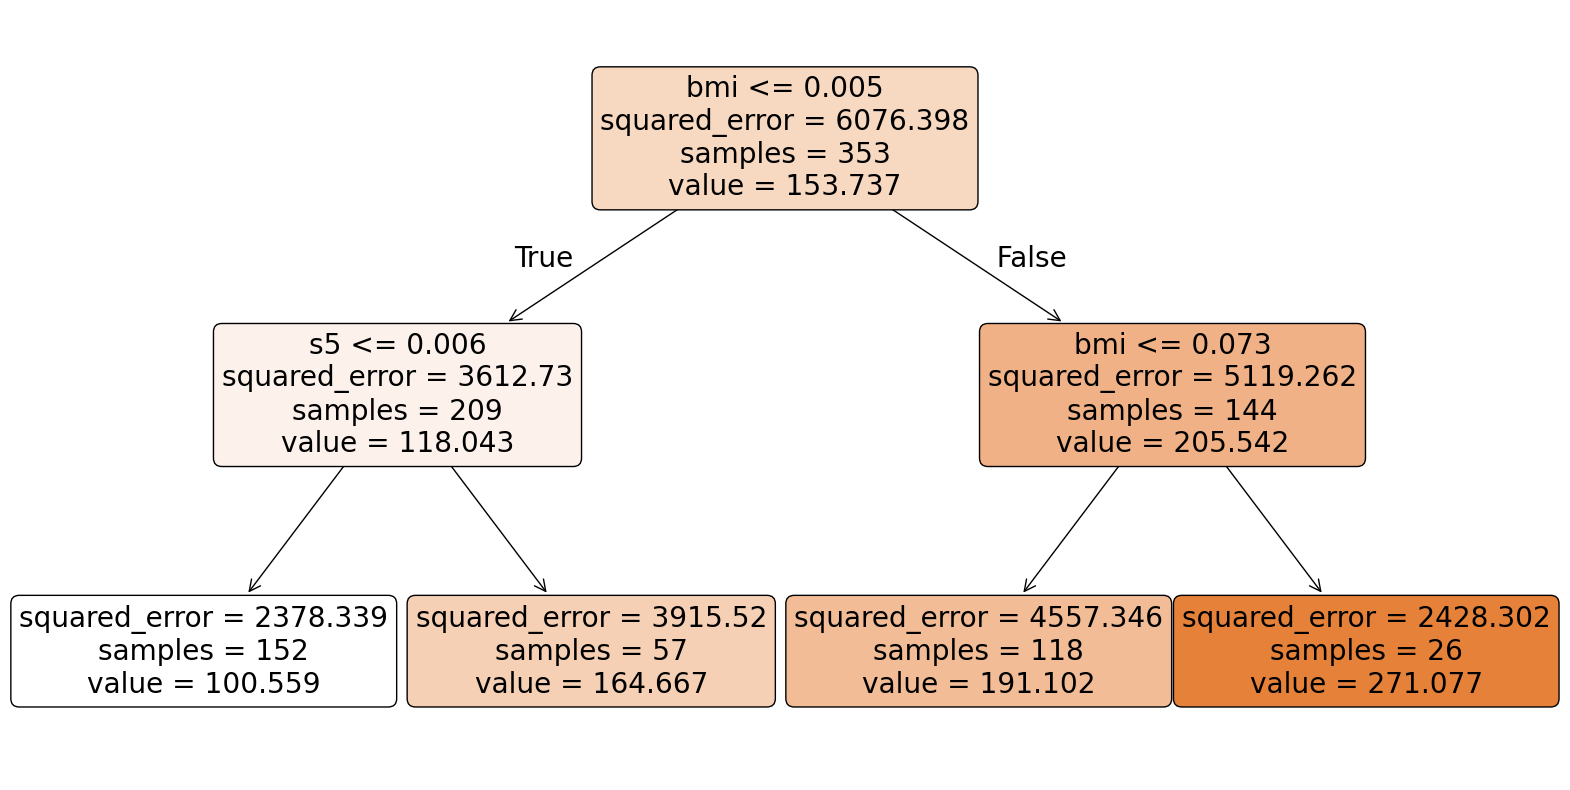

Mean Squared Error (MSE) with tuning: 3735.50
R-squared (R2) with tuning: 0.29


In [2]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_regressor_tuned = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(dt_regressor_tuned, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

dt_regressor_tuned = DecisionTreeRegressor(**best_params, random_state=42)
dt_regressor_tuned.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_regressor_tuned, feature_names=diabetes.feature_names, filled=True, rounded=True)
plt.show()

y_pred_tuned = dt_regressor_tuned.predict(X_test)

mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Mean Squared Error (MSE) with tuning: {mse_tuned:.2f}")
print(f"R-squared (R2) with tuning: {r2_tuned:.2f}")

Perform regression using a random forest model
* Use the same hyperparameters for the random forest as you did for the previous decision tree, and furthermore choose a hyperparameter value specifying the number of trees
* Use grid search cross-validation to scan across a grid of hyperparameters values and find an optimal combination
* After you obtain the optimum hyperparameter values, train your model with the chosen hyperparameters
* Use a tree visualization method to show at least two of the decision trees that are a part of your forest of decision trees
* Evaluate the final MSE and R-squared scores for your model on your test data

Best hyperparameters for Random Forest: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


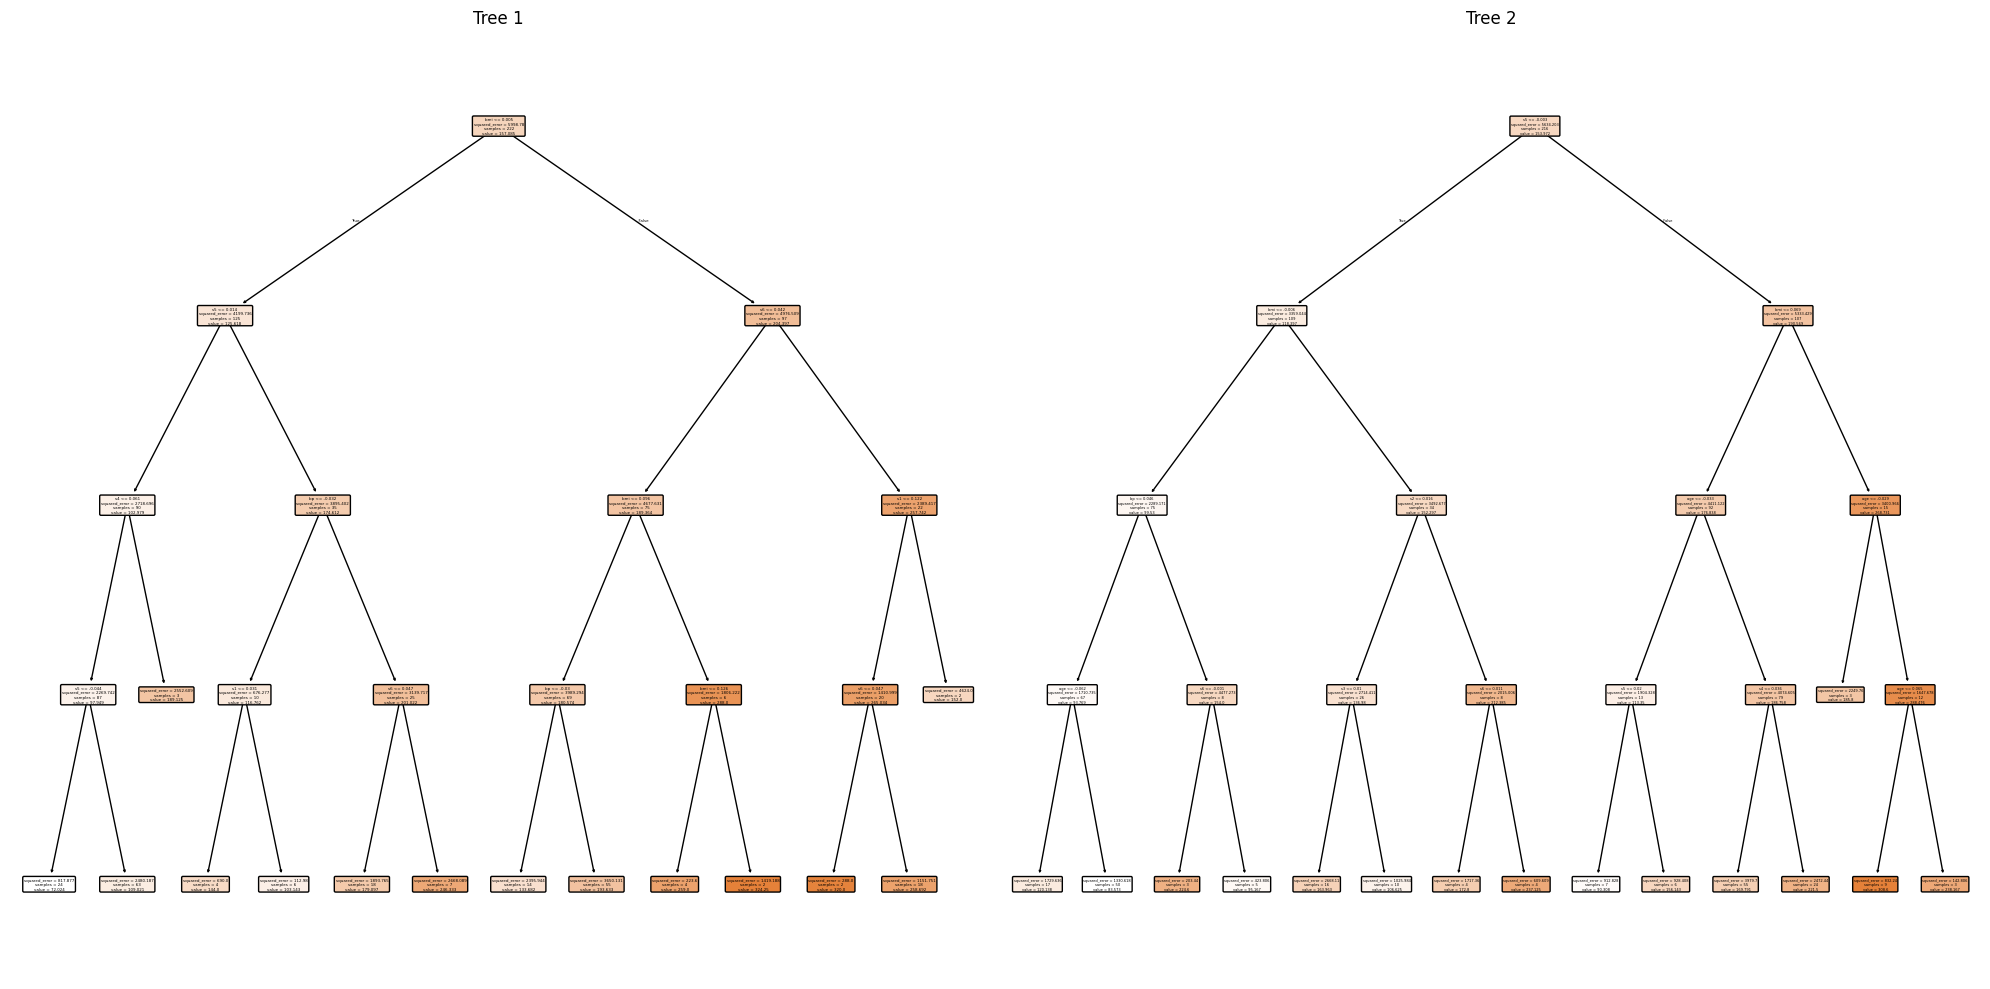

Mean Squared Error (MSE) with tuned Random Forest: 2834.09
R-squared (R2) with tuned Random Forest: 0.47


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_regressor = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(rf_regressor, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
print(f"Best hyperparameters for Random Forest: {best_params_rf}")

rf_regressor_tuned = RandomForestRegressor(**best_params_rf, random_state=42)
rf_regressor_tuned.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
for i in range(min(2, len(rf_regressor_tuned.estimators_))):
    plt.subplot(1, 2, i + 1)
    plot_tree(rf_regressor_tuned.estimators_[i], feature_names=diabetes.feature_names, filled=True, rounded=True)
    plt.title(f"Tree {i+1}")
plt.tight_layout()
plt.show()

y_pred_rf_tuned = rf_regressor_tuned.predict(X_test)

mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print(f"Mean Squared Error (MSE) with tuned Random Forest: {mse_rf_tuned:.2f}")
print(f"R-squared (R2) with tuned Random Forest: {r2_rf_tuned:.2f}")

Comment on the differences in your models and evaluation metrics for all three models.  Compare as well the differences in the evaluation metric values for these models with the metrics you obtained in the previous Regression Assignment for linear regression and k-nearest neighbors regression.

The Linear Regression with most correlated features and Decision Tree have similar results. The LR solution with all features is better then both of these however Random Forrest outperforms all the other models. The R-sqaured and MSE both are better then those of other models.

## Submit

* Save your work (File -> Save Notebook)
* Verify that your notebook runs without error by restarting the kernel (or closing and opening the notebook) and selecting the top menu item for Run -> Run All Cells.  It should run successfully all the way to the bottom.
* Save your notebook again.  Keep all the output visible when saving the final version.
* Submit the file through the Canvas Assignment.